In [2]:
#导入工具包
import re
import jieba
import collections
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#读取文件
path = r'./RedMansions.txt'
fn = open(path,encoding='utf-8')
string_data = fn.read()
fn.close()

In [7]:
# 分词
seg_list_exact = jieba.cut(string_data,cut_all = False) #精确分词模式
cut_text = " ".join(seg_list_exact)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Geoffrey\AppData\Local\Temp\jieba.cache
Loading model cost 2.096 seconds.
Prefix dict has been built succesfully.


In [6]:
#加载停用词
path = r'./stopwords.txt'
remove_words = list(open(path,encoding='utf-8').read())
remove_words.append("\n")
remove_words = remove_words +['了','着','过'] #自定义去除停用词

In [8]:
##信息贡献度提取主题词
from gensim.summarization import mz_keywords
keywords = mz_keywords(cut_text,scores=True,threshold=0.0002)
keywordsList6 = []
valueList6 = []
for word,value in keywords:
    if word not in remove_words:
        keywordsList6.append(word)
        valueList6.append(int(value*10000))
combine6 = sorted(zip(keywordsList6,valueList6)) 

C:\ProgramData\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:65: RuntimeWarning: divide by zero encountered in log2
  log_p = np.log2(p)
C:\ProgramData\Anaconda3\lib\site-packages\gensim\summarization\mz_entropy.py:66: RuntimeWarning: invalid value encountered in multiply
  h = np.nan_to_num(p * log_p).sum(axis=0)


In [9]:
num = 60
word_counts = collections.Counter(dict(combine6))
word_counts_top = word_counts.most_common(num)
word = pd.DataFrame(word_counts_top,columns=['关键词','信息贡献度'])
print(word)

    关键词  信息贡献度
0    宝玉     55
1    凤姐     33
2    贾母     29
3    贾琏     28
4   王夫人     24
5     笑     23
6    平儿     22
7    奶奶     21
8   刘姥姥     20
9    鸳鸯     20
10  qut     19
11   姑娘     19
12    吃     18
13  薛姨妈     17
14   黛玉     17
15  凤姐儿     16
16   探春     16
17  老太太     16
18   众人     14
19   太太     14
20   湘云     14
21   香菱     14
22   晴雯     13
23   紫鹃     13
24   袭人     13
25   老爷     12
26   宝钗     11
27    李     11
28    纨     11
29   贾珍     11
30   二爷     10
31  周瑞家     10
32   一面      9
33   你们      9
34    忙      9
35   我们      9
36  林黛玉      9
37   薛蟠      9
38   贾政      9
39  邢夫人      9
40   雨村      9
41   他们      8
42   姐姐      8
43   贾芸      8
44   银子      8
45    麝      8
46   东西      7
47   什么      7
48   尤氏      7
49   丫头      6
50   和尚      6
51   媳妇      6
52  林之孝      6
53   没有      6
54    睡      6
55    薛      6
56  贾政道      6
57   贾赦      6
58  赵姨娘      6
59   金桂      6


In [16]:
#获取单词数字对应的矩阵
word_T = pd.DataFrame(word.values.T,columns=word.iloc[:,0])
net = pd.DataFrame(np.mat(np.zeros((num,num))),columns=word.iloc[:,0])

#构造语义关联矩阵
k = 0
cleanList = dict([(w,v) for w,v in combine6 if w not in remove_words])
word_counts2 = collections.Counter(cleanList)
word_counts_top2 = word_counts2.most_common(num)
word2 = pd.DataFrame(word_counts_top2)
word2_T = pd.DataFrame(word2.values.T,columns=word2.iloc[:,0])
relation = list(0 for x in range(num))

for j in range(num):
    for p in range(len(word2)):
        if word.iloc[j,0] == word2.iloc[p,0]:
            relation[j] = 1
            break
            
for j in range(num):
    if relation[j] == 1:
        for q in range(num):
            if relation[q] == 1:
                net.iloc[j,q] = net.iloc[j,q] + word2_T.loc[1,word_T.iloc[0,q]]               


In [17]:
G = nx.Graph()
for i in range(num):
    for j in range(i,num):
        G.add_weighted_edges_from([(word.iloc[i,0],word.iloc[j,0],net.iloc[i,j])])
print(G.edges())

[('宝玉', '宝玉'), ('宝玉', '凤姐'), ('宝玉', '贾母'), ('宝玉', '贾琏'), ('宝玉', '王夫人'), ('宝玉', '笑'), ('宝玉', '平儿'), ('宝玉', '奶奶'), ('宝玉', '刘姥姥'), ('宝玉', '鸳鸯'), ('宝玉', 'qut'), ('宝玉', '姑娘'), ('宝玉', '吃'), ('宝玉', '薛姨妈'), ('宝玉', '黛玉'), ('宝玉', '凤姐儿'), ('宝玉', '探春'), ('宝玉', '老太太'), ('宝玉', '众人'), ('宝玉', '太太'), ('宝玉', '湘云'), ('宝玉', '香菱'), ('宝玉', '晴雯'), ('宝玉', '紫鹃'), ('宝玉', '袭人'), ('宝玉', '老爷'), ('宝玉', '宝钗'), ('宝玉', '李'), ('宝玉', '纨'), ('宝玉', '贾珍'), ('宝玉', '二爷'), ('宝玉', '周瑞家'), ('宝玉', '一面'), ('宝玉', '你们'), ('宝玉', '忙'), ('宝玉', '我们'), ('宝玉', '林黛玉'), ('宝玉', '薛蟠'), ('宝玉', '贾政'), ('宝玉', '邢夫人'), ('宝玉', '雨村'), ('宝玉', '他们'), ('宝玉', '姐姐'), ('宝玉', '贾芸'), ('宝玉', '银子'), ('宝玉', '麝'), ('宝玉', '东西'), ('宝玉', '什么'), ('宝玉', '尤氏'), ('宝玉', '丫头'), ('宝玉', '和尚'), ('宝玉', '媳妇'), ('宝玉', '林之孝'), ('宝玉', '没有'), ('宝玉', '睡'), ('宝玉', '薛'), ('宝玉', '贾政道'), ('宝玉', '贾赦'), ('宝玉', '赵姨娘'), ('宝玉', '金桂'), ('凤姐', '凤姐'), ('凤姐', '贾母'), ('凤姐', '贾琏'), ('凤姐', '王夫人'), ('凤姐', '笑'), ('凤姐', '平儿'), ('凤姐', '奶奶'), ('凤姐', '刘姥姥'), ('凤姐', '鸳鸯'), ('凤姐', 'qut'), ('凤姐', '姑娘'),

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


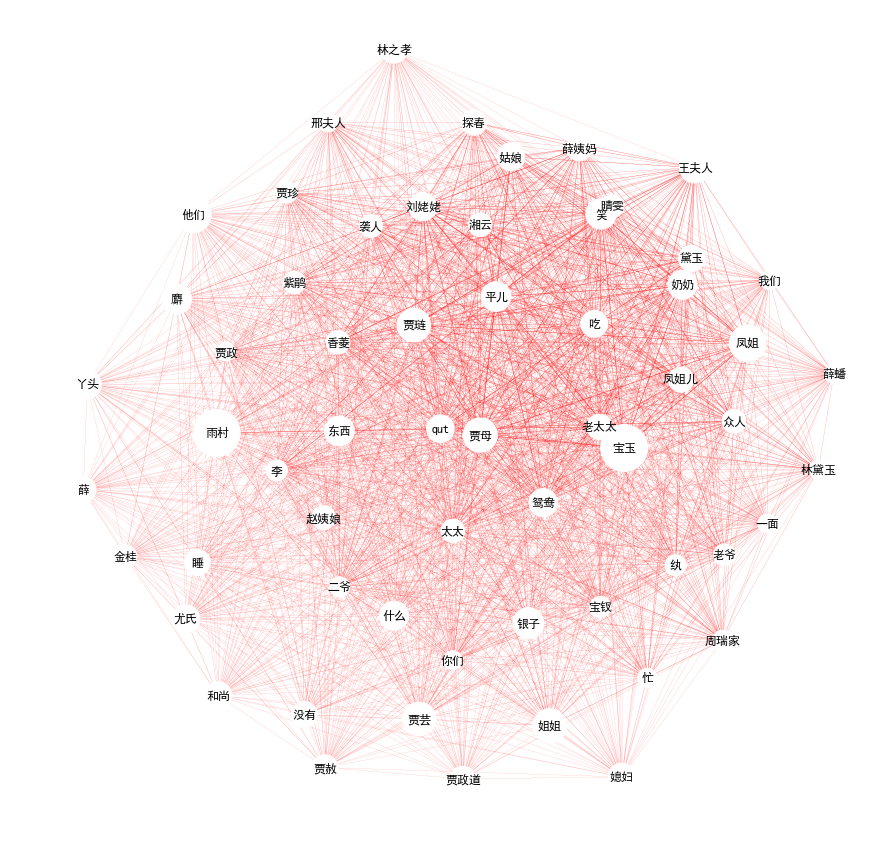

In [18]:
plt.figure(figsize=(15,15))
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.rcParams['font.sans-serif'] = ['SimHei']   # 用来正常显示中文标签
nx.draw_networkx(G,
                pos = nx.spring_layout(G),
                width = [float(v['weight']/80) for (r,c,v) in G.edges(data=True)],
                edge_color = 'red',
                node_size = [float(net.iloc[i,i]*40) for i in np.arange(40)],
                node_color='white')
plt.axis('off')
plt.show()